### 1. First order ODEs {-}
(3 points) Convert the following differential equations to first order form. All variables are scalars.

**(a)** $x'' = 6x' -2$
$
\\
\begin{align*}
Y &=  \begin{bmatrix}
           y_{1} \\
           y_{2} \\
         \end{bmatrix} y_1 = x, y_2 = x^{'}\\
\frac{dY}{dt} &= \begin{bmatrix}
           x^{'} \\
           x^{''} \\
         \end{bmatrix} =  \begin{bmatrix}
           y_{2}\\
           6y_2 - 2 \\
         \end{bmatrix}
\end{align*}
$

**(b)** $y''' + \sin(y') - \cos(y) = 1$
$
\\
\begin{align*}
Z &=  \begin{bmatrix}
           z_{1} \\
           z_{2} \\
           z_{3}
         \end{bmatrix} z_1 = y, z_2 = y^{'}, z_3 = y^{''}\\
\frac{dZ}{dt} &= \begin{bmatrix}
           y^{'} \\
           y^{''} \\
           y^{'''}
         \end{bmatrix} =  \begin{bmatrix}
           z_{2}\\
           z_{3}\\
            1 - \sin(z_2) + \cos(z_1)\\
         \end{bmatrix}
\end{align*}
$
**(c)** $x'''\sqrt{x'' x^2} - e^{x'} = \sin(x)$
$
\\
\begin{align*}
Z &=  \begin{bmatrix}
           z_{1} \\
           z_{2} \\
           z_{3}
         \end{bmatrix} z_1 = x, z_2 = x^{'}, z_3 = x^{''}\\
\frac{dZ}{dt} &= \begin{bmatrix}
           x^{'} \\
           x^{''} \\
           x^{'''}
         \end{bmatrix} =  \begin{bmatrix}
           z_{2}\\
           z_{3}\\
            \frac{\sin(z_1) + e^{z_2}}{\sqrt{z_3 z_1^2}}\\
         \end{bmatrix}
\end{align*}
$

### 2. Runge-Kutta Tableaus {-}
(6 points) Convert the following Runge-Kutta tableaus to their equations or vice versa. State the number of stages of the method, whether it is implicit or explicit and check if it is a valid method. Justify your reasoning when it is not valid.

**(a)** 
$$\begin{array}{l|ll|}
0 &0 & 0 \\
\frac23 & \frac23 & 0 \\
\hline
& \frac14 & \frac34
\end{array}$$


This table has is a lower triangular matrix and thus is an explicit method. We create the equation: 
$
\begin{align*}
Y_1 &= y_i\\
Y_2 &= y_i + \frac{2h}{3}f(t_{i}, Y_1)\\
y_{i+1} &= y_i + \frac{h}{4}(f(t_i, Y_1) + 3f(t_{i} + h*(2/3), Y_2))
\end{align*}
\\
$

This is valid. As all $T_j$, $c_j$ and $b_k$ variables match.

**(b)** \begin{align*}
Y_1 &= y_i \\
Y_2 &= y_i + \frac12 h f(t_i,Y_1) \\
Y_3 &= y_i + \frac12 h f(t_i,Y_1) + \frac12 h f(t_i+h, Y_2) \\
y_{i+1} &= y_i + \frac13 h(f(t_i+\frac23 h, Y_3) + f(t_i+h,Y_2) + f(t_i,Y_1))
\end{align*}

$$\begin{array}{l|lll|}
0 & 0 & 0 & 0 \\
\frac{1}{2} & \frac12 & 0 & 0 \\
1 & \frac12 & \frac12 & 0 \\
\hline
& \frac13 & \frac13 & \frac13
\end{array}$$
This is not a valid method as the $T_j$ values do not match with the summed $c_j$ values. For instance, for $Y_2$, $t_i + h$ implies that $c_2 = 1$ but it equals $1/2$. Another instance, is for $f(T_3, Y_3)$ as the $T_3 = t_i + (2/3)h$ implies that the sum of all columns across row 3 is (2/3) but it is 1.

**(c)** $$\begin{array}{l|lll|}
0 & 0 & 0 & 0 \\
1 & \frac12 & 0 & 0 \\
\frac23 & \frac12 & \frac12 & 0 \\
\hline
& \frac13 & \frac13 & \frac13
\end{array}$$

This is not a valid table as $c_3 \neq \sum_{k = 1}^{s}a_{3,k}$. However, the resulting equation would be: 
$
\\
\begin{align*}
Y_1 &= y_{i}\\
Y_2 &= y_{i} + \frac{h}{2}f(t_i, Y_1)\\
Y_3 &= y_{i} + \frac{h}{2}f(t_i, Y_1) + f(t_i + h/2, Y_2)\\
y_{i + 1} &= y_{i} + \frac{h}{3}(f(t_i, Y_1) + f(t_i + h/2, Y_2) + f(t_i + h, Y_3)) 
\end{align*}
\\
$
As we can see the $c_j$ and $T_j$ values differ. Thus, not valid.

### 3. Explicit Euler {-}

**(a)** (3 points) Write a Python function that computes the explicit Euler method for an array-valued ODE $\mathbf{y}' = f(t,\mathbf{y})$. The initial values $\mathbf{y}(0)$ are an array of the according size. Further, the function takes as inputs the function $f$, step size $h$ and number of steps $n$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Euler(fun,h,n,y0):
    # input: function f(t,y) that takes an array as input y
    #        step size h
    #        number of steps to take n 
    #        (starting at 0, so the interval will be [0,b] with b=n*h)
    #        array of initial values, y(0) = y0
    # output: y of size [m,n+1] with m the size of y.
    m = len(y0)
    y = np.zeros((m, n)) 
    y[:,0] = y0
    t_next = 0
    for i in range(1, n):
        t_next = t_next + h
        y[:, i] = y[:, i - 1] + h*fun(t_next, y[:,i - 1]) 
        
    
    return y

**(b)** (2 points) Write the following function in Python and use your function `Euler` from (a) to plot the solution for the ODE with the given step sizes and intervals. Make one figure and plot both solution components in it. Add a legend for the solution components.   

[5.         5.0069975  5.01401276 ... 7.27100049 7.26954415 7.26808821]
[ 2.          1.96101     1.92231462 ... -3.         -3.
 -3.        ]


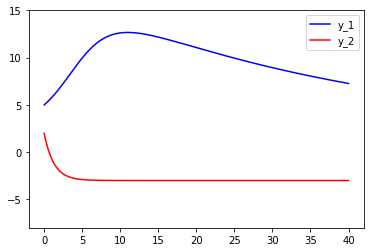

In [7]:
def f_y1(t, y):
    return 0.5*np.exp(-1*0.025*t)*y[1] - 0.03*y[0]*y[1]

def f_y2(t, y): 
    return -0.8*np.exp(-1*0.025*t)*y[0] + 0.01*y[0]*y[1]

#Notice that we assume that the input vector will be of size 2. 

y_0 = [5,2]

y_1 = Euler(f_y1, 0.01, 4000, y_0)[0]
y_2 = Euler(f_y2, 0.01, 4000, y_0)[1]

t_eval = np.linspace(0,40, 4000)

#plot vectors
print(y_1)
print(y_2)
plt.plot(t_eval, y_1, 'b', label = 'y_1')
plt.plot(t_eval, y_2, 'r', label = 'y_2')
plt.ylim(-8,15)
plt.legend(loc = "upper right")
plt.show()

**(c)** (4 points) Solve the following ODE system using your code `Euler` from (a). 
$$ \mathbf{y}'' = 10A \mathbf{y} \qquad \text{with} \qquad A = N^2 \begin{pmatrix} -1 & 1 & & & \\ 1 & -2 & \ddots & & \\ & \ddots & \ddots & \ddots & \\ & & \ddots & -2 & 1 \\ & & & 1 & -1 \end{pmatrix} \in \mathbb{R}^{N \times N} $$
$A$ is a tridiagonal matrix, where the subdiagonals are $1$ and the diagonal is $-2$, except for the first and last value, where it is $-1$. (This matrix comes from a spatial discretization of the one-dimensional wave equation.)   

Use $N=10$, $h=0.001$ on the interval $[0,1]$ and initial values $\mathbf{y}(0) = [0.1,0.2,\dots,1]$ and $\mathbf{y}'(0) = [0,\dots,0]$. Plot all solution components in one figure.

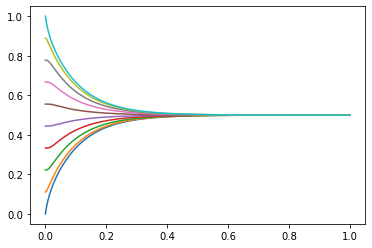

In [6]:
#We let w = y_i', thus converting to a first-order form
#There is no initial function for the first euler: y_{i+1} = y_{i} + hw_i
#and since y'(0) = [0,...0] we can continue without solving

n = 10
A = -2*np.eye(n) + np.eye(n, k=1) + np.eye(n, k=-1)
A[0,0] = A[-1,-1] = -1
A = 100*A
y_0 = np.linspace(0, 1, 10, endpoint = True)
def f_y(t, y):
    #notice the t is not used, but kept in the parameter for consistency
    #y is a N size vector
    return 10*(A.dot(y))

w = Euler(f_y, 0.0001, 1000, y_0)
interval = np.linspace(0, 1, 1000)
plt.plot(interval, w[0])
plt.plot(interval, w[1])
plt.plot(interval, w[2])
plt.plot(interval, w[3])
plt.plot(interval, w[4])
plt.plot(interval, w[5])
plt.plot(interval, w[6])
plt.plot(interval, w[7])
plt.plot(interval, w[8])
plt.plot(interval, w[9])
plt.show()

**(d)** (3 points) For the ODE system
$$ \mathbf{y}' = \begin{pmatrix} 1 & 2 & 3 \\ 4 & -150 & 6 \\ 7 & 8 & -200 \end{pmatrix} \mathbf{y} $$
with initial values $\mathbf{y}(0) = [1,1,1]$, first determine the maximum step size $h_{\text{max}}$ from the necessary absolute stability conditions and and then use your function to plot the last solution component on the interval $[0,2]$ with step size $h = 0.5*h_{\text{max}}$. Add another plot using $h=0.9*h_{\text{max}}$. What do you notice, is the result stable and would this step size be sufficient to get a good solution?  

0.009948865595631979


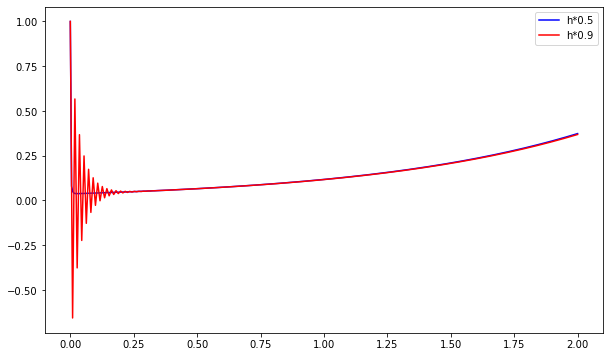

In [5]:
#Let us first find the eigen values of the matrix, taking then the maximum of the aboslute values 
#of those eigen values. 

A = np.zeros((3,3))
A[:,0] = [1,4,7]
A[:,1] = [2,-150,8]
A[:,2] = [3,6,-200]

eigvals, eigvecs = np.linalg.eig(A)

max_eig = np.max(np.abs(eigvals))

#Since h_max <= 2/|max_eig| by the ODE depending on the problem shown.
h_max = (2/max_eig)
print(h_max)
#Define the function
def f(t,y):
    return A.dot(y)

y_0 = [1,1,1]
m_1 = int(2/(h_max*0.5))
m_2 = int(2/(h_max*0.9))
y_1 = Euler(f, h_max*0.5, m_1, y_0)
y_2 = Euler(f, h_max*0.9, m_2, y_0)
interval_1 = np.linspace(0, 2, m_1)
interval_2 = np.linspace(0, 2, m_2)
plt.figure(figsize=(10,6))
plt.plot(interval_1, y_1[2], c = 'b', label = "h*0.5")
plt.plot(interval_2, y_2[2], c = 'r', label = "h*0.9")
plt.legend(loc = "upper right")
plt.show()


Since the step size cannot exceed the provided bound, we know that second step size closer to that bound is by "less stable" perhaps explaining the oscillation effect. 